In [37]:
import numpy as np
import pandas as pd
import plotly.express as px

from  matplotlib  import pyplot as plt


In [14]:
file_path = '../dataset/sales_transactions.xlsx'

In [16]:
df = pd.read_excel(file_path, index_col=0)

In [17]:
df

,ymd,transaction_id,SKU,transaction_type,payment,details,revenue,quantity,product_name
0,2020-01-07,250-0042069-0262213,60,0,1,4,-314,NaN,21
1,2020-01-07,250-0042069-0262213,60,0,1,8,-499,NaN,21
2,2020-01-07,250-0042069-0262213,60,0,1,10,-693,NaN,21
3,2020-01-07,250-0042069-0262213,60,0,4,0,5727,1.0,21
4,2020-01-07,250-0042069-0262213,60,0,2,2,29,NaN,21
...,...,...,...,...,...,...,...,...,...
609,2019-11-20,503-0100465-6209437,2,0,3,14,-373,NaN,60
610,2019-11-20,503-0100465-6209437,2,0,4,0,682,1.0,60
611,2019-11-20,503-0100465-6209437,2,0,2,9,68,NaN,60
612,2019-11-20,503-0100465-6209437,2,0,2,12,37,NaN,60


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 0 to 613
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ymd               597 non-null    datetime64[ns]
 1   transaction_id    597 non-null    object        
 2   SKU               597 non-null    int64         
 3   transaction_type  597 non-null    int64         
 4   payment           597 non-null    int64         
 5   details           597 non-null    int64         
 6   revenue           597 non-null    int64         
 7   quantity          144 non-null    float64       
 8   product_name      597 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 46.6+ KB


In [20]:
df['ymd'] = df['ymd'].astype(str)

In [21]:
df.dtypes

ymd                  object
transaction_id       object
SKU                   int64
transaction_type      int64
payment               int64
details               int64
revenue               int64
quantity            float64
product_name          int64
dtype: object

In [22]:
# objectからdatetimeに変換
df['ymd'] = pd.to_datetime(df['ymd'])

In [23]:
df.dtypes

ymd                 datetime64[ns]
transaction_id              object
SKU                          int64
transaction_type             int64
payment                      int64
details                      int64
revenue                      int64
quantity                   float64
product_name                 int64
dtype: object

In [24]:
# ymdの年だけを取り出す
df['ymd'].dt.year

0      2020
1      2020
2      2020
3      2020
4      2020
       ... 
609    2019
610    2019
611    2019
612    2019
613    2019
Name: ymd, Length: 597, dtype: int64

In [26]:
# ymdの月だけを取り出す
df['ymd'].dt.month

0       1
1       1
2       1
3       1
4       1
       ..
609    11
610    11
611    11
612    11
613    11
Name: ymd, Length: 597, dtype: int64

In [27]:
# ymdの日だけを取り出す
df['ymd'].dt.day

0       7
1       7
2       7
3       7
4       7
       ..
609    20
610    20
611    20
612    20
613    20
Name: ymd, Length: 597, dtype: int64

In [28]:
df

,ymd,transaction_id,SKU,transaction_type,payment,details,revenue,quantity,product_name
0,2020-01-07,250-0042069-0262213,60,0,1,4,-314,NaN,21
1,2020-01-07,250-0042069-0262213,60,0,1,8,-499,NaN,21
2,2020-01-07,250-0042069-0262213,60,0,1,10,-693,NaN,21
3,2020-01-07,250-0042069-0262213,60,0,4,0,5727,1.0,21
4,2020-01-07,250-0042069-0262213,60,0,2,2,29,NaN,21
...,...,...,...,...,...,...,...,...,...
609,2019-11-20,503-0100465-6209437,2,0,3,14,-373,NaN,60
610,2019-11-20,503-0100465-6209437,2,0,4,0,682,1.0,60
611,2019-11-20,503-0100465-6209437,2,0,2,9,68,NaN,60
612,2019-11-20,503-0100465-6209437,2,0,2,12,37,NaN,60


In [29]:
# NaNを1に変換
df = df.fillna({'quantity': 1})

In [30]:
df

,ymd,transaction_id,SKU,transaction_type,payment,details,revenue,quantity,product_name
0,2020-01-07,250-0042069-0262213,60,0,1,4,-314,1.0,21
1,2020-01-07,250-0042069-0262213,60,0,1,8,-499,1.0,21
2,2020-01-07,250-0042069-0262213,60,0,1,10,-693,1.0,21
3,2020-01-07,250-0042069-0262213,60,0,4,0,5727,1.0,21
4,2020-01-07,250-0042069-0262213,60,0,2,2,29,1.0,21
...,...,...,...,...,...,...,...,...,...
609,2019-11-20,503-0100465-6209437,2,0,3,14,-373,1.0,60
610,2019-11-20,503-0100465-6209437,2,0,4,0,682,1.0,60
611,2019-11-20,503-0100465-6209437,2,0,2,9,68,1.0,60
612,2019-11-20,503-0100465-6209437,2,0,2,12,37,1.0,60


In [31]:
# 売上または返金のトランザクションを計算(revenue * quantity)
df['sales'] = df['revenue'] * df['quantity']

In [32]:
df

,ymd,transaction_id,SKU,transaction_type,payment,details,revenue,quantity,product_name,sales
0,2020-01-07,250-0042069-0262213,60,0,1,4,-314,1.0,21,-314.0
1,2020-01-07,250-0042069-0262213,60,0,1,8,-499,1.0,21,-499.0
2,2020-01-07,250-0042069-0262213,60,0,1,10,-693,1.0,21,-693.0
3,2020-01-07,250-0042069-0262213,60,0,4,0,5727,1.0,21,5727.0
4,2020-01-07,250-0042069-0262213,60,0,2,2,29,1.0,21,29.0
...,...,...,...,...,...,...,...,...,...,...
609,2019-11-20,503-0100465-6209437,2,0,3,14,-373,1.0,60,-373.0
610,2019-11-20,503-0100465-6209437,2,0,4,0,682,1.0,60,682.0
611,2019-11-20,503-0100465-6209437,2,0,2,9,68,1.0,60,68.0
612,2019-11-20,503-0100465-6209437,2,0,2,12,37,1.0,60,37.0


In [33]:
# 日別の売上計算
daily_sales_df = df.groupby('ymd')['sales'].sum().reset_index()

In [34]:
daily_sales_df

,ymd,sales
0,2019-11-20,3128.0
1,2019-11-21,2516.0
2,2019-11-23,928.0
3,2019-11-24,1491.0
4,2019-11-26,1095.0
5,2019-11-28,1555.0
6,2019-11-30,1105.0
7,2019-12-03,6661.0
8,2019-12-07,6525.0
9,2019-12-09,302.0


(array([18222., 18231., 18238., 18245., 18252., 18262., 18269.]),
 [Text(18222.0, 0, '2019-11-22'),
  Text(18231.0, 0, '2019-12-01'),
  Text(18238.0, 0, '2019-12-08'),
  Text(18245.0, 0, '2019-12-15'),
  Text(18252.0, 0, '2019-12-22'),
  Text(18262.0, 0, '2020-01-01'),
  Text(18269.0, 0, '2020-01-08')])

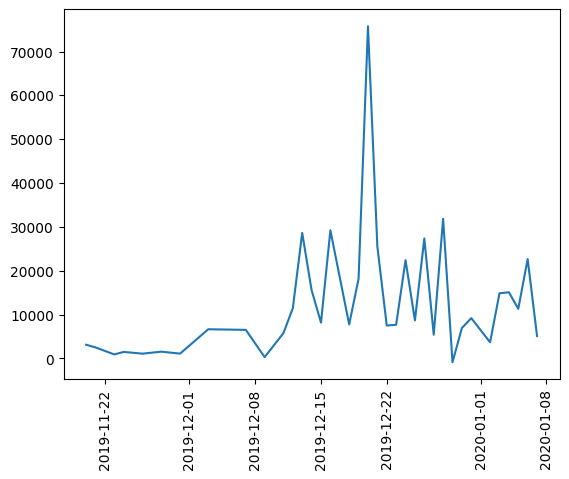

In [40]:
plt.plot(daily_sales_df['ymd'], daily_sales_df['sales'])
plt.xticks(rotation=90)

In [41]:
daily_sales_df.head()

,ymd,sales
0,2019-11-20,3128.0
1,2019-11-21,2516.0
2,2019-11-23,928.0
3,2019-11-24,1491.0
4,2019-11-26,1095.0


In [42]:
# 週別の売上に変換(週別にするにはインデックスを日付にする必要がある)
daily_sales_df.set_index('ymd').resample('W').sum()

,sales
ymd,
2019-11-24,8063.0
2019-12-01,3755.0
2019-12-08,13186.0
2019-12-15,69931.0
2019-12-22,163973.0
2019-12-29,102575.0
2020-01-05,61131.0
2020-01-12,27774.0


In [43]:
daily_sales_df.head(10)

,ymd,sales
0,2019-11-20,3128.0
1,2019-11-21,2516.0
2,2019-11-23,928.0
3,2019-11-24,1491.0
4,2019-11-26,1095.0
5,2019-11-28,1555.0
6,2019-11-30,1105.0
7,2019-12-03,6661.0
8,2019-12-07,6525.0
9,2019-12-09,302.0


In [44]:
# 経過日数を求める
daily_sales_df['ymd'] - daily_sales_df.iloc[0, 0]

0     0 days
1     1 days
2     3 days
3     4 days
4     6 days
5     8 days
6    10 days
7    13 days
8    17 days
9    19 days
10   21 days
11   22 days
12   23 days
13   24 days
14   25 days
15   26 days
16   28 days
17   29 days
18   30 days
19   31 days
20   32 days
21   33 days
22   34 days
23   35 days
24   36 days
25   37 days
26   38 days
27   39 days
28   40 days
29   41 days
30   43 days
31   44 days
32   45 days
33   46 days
34   47 days
35   48 days
Name: ymd, dtype: timedelta64[ns]